# CAPEX is the overnight cost so construction period doesn't matter

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib as mpl
#enable latex editing
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [26]:
#Wholesale price is random input variable over the plant lifetime
def NPV(n,r,cf,It0,OMkwh,OMfixed,wholesale_price):
    prod=cf*1*365*24
    It=np.zeros(n)
    It[0]=It0
    Mt=np.ones(n)*(OMkwh*prod+OMfixed)
    Et=np.ones(n)*prod  #kwH
    discounted_benefits=0.0
    discounted_costs=0.0
    for x in range(n):
        t=x
        benefit=Et[x]*(wholesale_price/1000)/np.power((1+r),t)
        cost=(It[x]+Mt[x])/np.power((1+r),t)
        discounted_benefits=discounted_benefits+benefit
        discounted_costs=discounted_costs+cost
    return discounted_benefits-discounted_costs
    

In [27]:
#Wholesale price is a random variable from year to year of plant lifetime
def NPV2(n,r,cf,It0,OMkwh,OMfixed,wholesale_price_min,wholesale_price_max):
    prod=cf*1*365*24
    It=np.zeros(n)
    It[0]=It0
    Mt=np.ones(n)*(OMkwh*prod+OMfixed)
    Et=np.ones(n)*prod  #kwH
    discounted_benefits=0.0
    discounted_costs=0.0
    for x in range(n):
        t=x
        wholesale_price=np.random.uniform(low=wholesale_price_min,high=wholesale_price_max)
        benefit=Et[x]*(wholesale_price/1000)/np.power((1+r),t)
        cost=(It[x]+Mt[x])/np.power((1+r),t)
        discounted_benefits=discounted_benefits+benefit
        discounted_costs=discounted_costs+cost
    return discounted_benefits-discounted_costs

# Nuclear power NPV histogram

In [28]:
#Nuclear parameters from DIW report
It0=4000  #Euros/kW
n=40      #years
cf=0.9
r=0.04    #Discount rate
OMkwh=0.012  #Euros/kWh variable O&M
OMfixed=90   #Euros/kW fixed O&M
wholesale_price=80  #Euros/MWh

In [29]:
#Testing that the function works reasonably
NPV_nuclear=NPV(n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

In [30]:
NPV_nuclear

5.18298570039047

In [31]:
#sample over bunch of random parameters...uniform distributions...
samples=100000
NPV_nuclearv=np.zeros(samples)
NPV2_nuclearv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itmin=4000
Itmax=9000
wholesalemin=20
wholesalemax=80
#numpy.random.uniform(low=0.0, high=1.0, size=None)
for x in range(samples):
    It0=np.random.uniform(low=Itmin,high=Itmax)
    wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)
    r=np.random.uniform(low=rmin,high=rmax)
    #These uniform distributions are kind of idiotic
    NPV_nuclearv[x]=NPV(n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant
    NPV2_nuclearv[x]=NPV2(n,r,cf,It0,OMkwh,OMfixed,wholesalemin,wholesalemax)/1000

In [32]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

mpl.rc('font', **font)

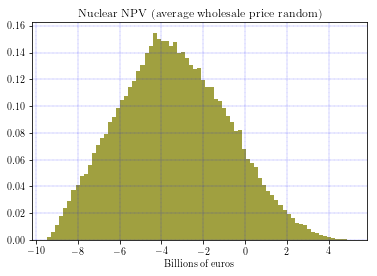

In [33]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.hist(NPV_nuclearv, bins=75,alpha=0.75,density=True,color = ["olive"])
plt.title("Nuclear NPV (average wholesale price random)")
plt.xlabel("Billions of euros")
#plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
#plt.xlim((-10,0))
plt.savefig('./Nice_ones/Nuclear_NPV.png')
plt.show()

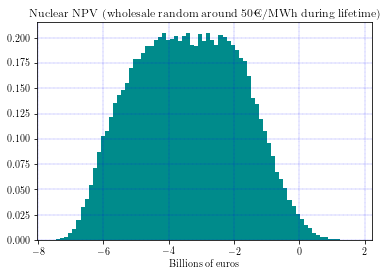

In [34]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.hist(NPV2_nuclearv, bins=75,alpha=1,density=True,color = ["darkcyan"])
plt.title("Nuclear NPV (wholesale random around 50€/MWh during lifetime)")
plt.xlabel("Billions of euros")
#plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
#plt.xlim((-10,0))
plt.savefig('./Nice_ones/Nuclear_NPV2.png')
plt.show()

# Onshore wind power NPV histogram
https://www.ise.fraunhofer.de/content/dam/ise/en/documents/publications/studies/EN2018_Fraunhofer-ISE_LCOE_Renewable_Energy_Technologies.pdf

In [25]:
#Wind parameters
It0=1500  #Euros/kW
n=25      #years
cf=0.25
r=0.04    #Discount rate
OMkwh=0.005  #Euros/kWh variable O&M
OMfixed=30   #Euros/kW fixed O&M
wholesale_price=80  #Euros/MWh

In [40]:
#sample over bunch of parameters
NPV_windv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itmin=1500
Itmax=2000
wholesalemin=20
wholesalemax=80
cfmin=0.2
cfmax=0.37
for x in range(samples):
    It0=np.random.uniform(low=Itmin,high=Itmax)
    wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)
    r=np.random.uniform(low=rmin,high=rmax)
    cf=np.random.uniform(low=cfmin,high=cfmax)
    NPV_windv[x]=NPV(n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

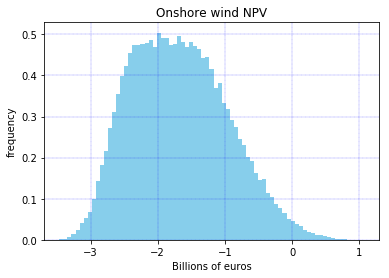

In [42]:
plt.hist(NPV_windv, bins=75,density=True,color = ["skyblue"])
plt.title("Onshore wind NPV")
plt.xlabel("Billions of euros")
plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.savefig('Wind_NPV.png')
plt.show()

# Photovoltaics Germany NPV histogram
https://www.ise.fraunhofer.de/content/dam/ise/en/documents/publications/studies/EN2018_Fraunhofer-ISE_LCOE_Renewable_Energy_Technologies.pdf

In [43]:
#Photovoltaics parameters
It0=1400  #Euros/kW
n=25      #years
cf=0.1
r=0.04    #Discount rate
OMkwh=0.0  #Euros/kWh variable O&M
#OMfixed=30   #Euros/kW fixed O&M...for solar given as a percentage of capex
wholesale_price=80  #Euros/MWh

In [44]:
#sample over bunch of parameters
NPV_solarv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itmin=600
Itmax=1400
wholesalemin=20
wholesalemax=80
cfmin=0.09
cfmax=0.12
for x in range(samples):
    It0=np.random.uniform(low=Itmin,high=Itmax)
    OMfixed=0.025*It0   #2.5% of capex
    wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)
    r=np.random.uniform(low=rmin,high=rmax)
    cf=np.random.uniform(low=cfmin,high=cfmax)
    NPV_solarv[x]=NPV(n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

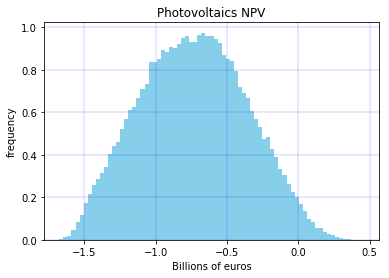

In [45]:
plt.hist(NPV_solarv, bins=75,density=True,color = ["skyblue"])
plt.title("Photovoltaics NPV")
plt.xlabel("Billions of euros")
plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.savefig('Solar_NPV.png')
plt.show()

# Offshore wind Germany NPV histogram
https://www.ise.fraunhofer.de/content/dam/ise/en/documents/publications/studies/EN2018_Fraunhofer-ISE_LCOE_Renewable_Energy_Technologies.pdf

In [46]:
#Offshore wind parameters
It0=3100  #Euros/kW
n=25      #years
cf=0.37
r=0.04    #Discount rate
OMkwh=0.0  #Euros/kWh variable O&M
OMfixed=100   #Euros/kW fixed O&M...for solar given as a percentage of capex
wholesale_price=80  #Euros/MWh

In [47]:
#sample over bunch of parameters
NPV_owindv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itmin=3100
Itmax=4700
wholesalemin=20
wholesalemax=80
cfmin=0.37
cfmax=0.51
for x in range(samples):
    It0=np.random.uniform(low=Itmin,high=Itmax)
    wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)
    r=np.random.uniform(low=rmin,high=rmax)
    cf=np.random.uniform(low=cfmin,high=cfmax)
    NPV_owindv[x]=NPV(n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

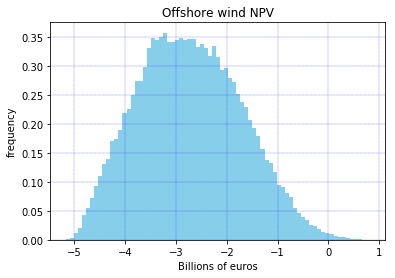

In [48]:
plt.hist(NPV_owindv, bins=75,density=True,color = ["skyblue"])
plt.title("Offshore wind NPV")
plt.xlabel("Billions of euros")
plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.savefig('Offshore_wind_NPV.png')
plt.show()